<a href="https://colab.research.google.com/github/sreyareddy15/Twitter_sentiment_analysis/blob/main/sentimantal_pr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter sentiment analysis
The aim of the project is to classify the twitter data depending upon the emotion behind the tweet

### Importing required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import re
import seaborn as sns
%matplotlib inline

### Importing the data 
here we are using the data from kaggle

In [ ]:
#importing the data from an arline tweets for sentiment analysis
data_source_url = "https://raw.githubusercontent.com/sreyareddy15/Twitter_sentiment_analysis/main/tweets.csv"
airline_tweets = pd.read_csv(data_source_url)

In [ ]:
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
airline_tweets.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
airline_tweets.shape

(14640, 15)

### Data Analysis

In [ ]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


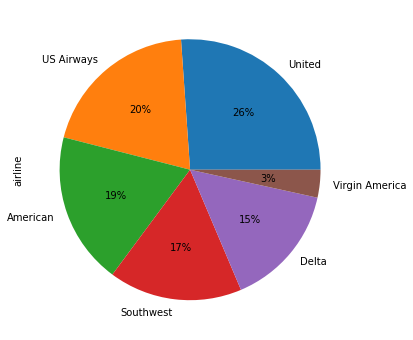

In [ ]:
#distribution of different arline companies
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

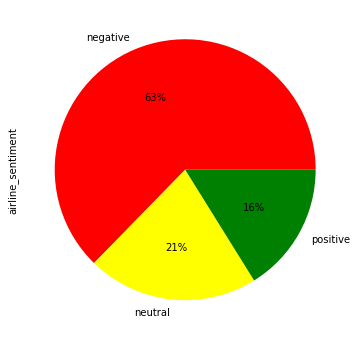

In [ ]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])


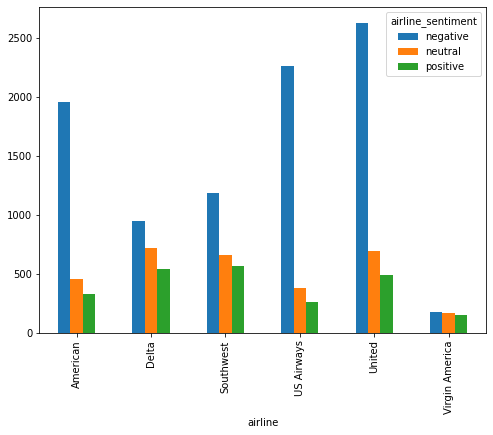

In [ ]:
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack() 
airline_sentiment.plot(kind='bar')

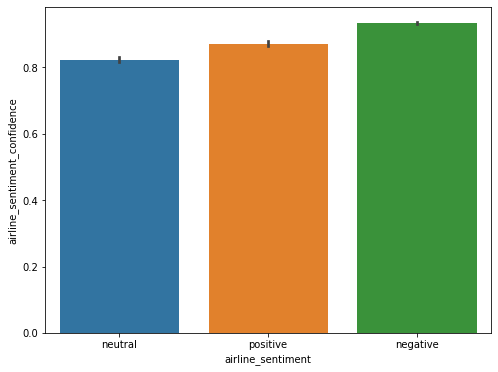

In [ ]:
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=airline_tweets)

### Data cleaning

In [ ]:
features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values

In [ ]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

## Text in numeric form 

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to spec

AttributeError: ignored

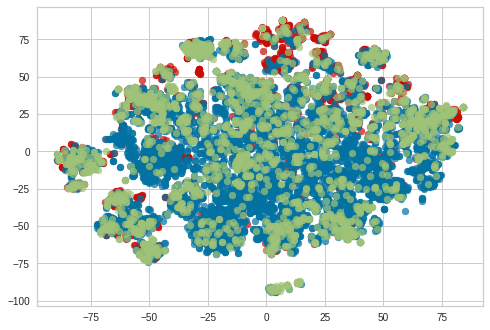

In [ ]:
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer()
tsne.fit(X_train, y_train)

## Training model

In [ ]:
#### RANDOM FOREST ###

from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
forest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
### LINEAR SVM ###

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
### GAUSSIAN SVM ###

from sklearn.svm import SVC
svclassifier_gaus = SVC(kernel="rbf", gamma="auto", C=1)
svclassifier_gaus.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
### LOGISTIC REGRESSION ###

from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
### KNN ###

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## predictions

In [ ]:
predictions_forest = forest_classifier.predict(X_test)
predictions_SVM=svclassifier.predict(X_test)
predictions_SVM_gaus=svclassifier_gaus.predict(X_test)
predictions_logistic = logistic_reg.predict(X_test)
predictions_knn = knn.predict(X_test)

## Evaluation 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#for random forest
print('confusion_matrix')
print(confusion_matrix(y_test,predictions_forest))
#print(classification_report(y_test,predictions_forest))
print('accuracy')
print(accuracy_score(y_test, predictions_forest))

confusion_matrix
[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
accuracy
0.7599043715846995


In [ ]:
#for linear kernel SVM
print('confusion matrix')
print(confusion_matrix(y_test,predictions_SVM))
#print(classification_report(y_test,predictions_SVM))
print('accuracy')
print(accuracy_score(y_test, predictions_SVM))

confusion matrix
[[1697  129   44]
 [ 264  306   44]
 [ 107   56  281]]
accuracy
0.7800546448087432


In [ ]:
#for gaussian SVM
print('Confusion_matrix')
print(confusion_matrix(y_test,predictions_SVM_gaus))
#print(classification_report(y_test,predictions_SVM_gaus))
print('Accuracy')
print(accuracy_score(y_test, predictions_SVM_gaus))

Confusion_matrix
[[1870    0    0]
 [ 614    0    0]
 [ 444    0    0]]
Accuracy
0.6386612021857924


In [ ]:
#for logistic 
print("Confusion-matrix")
print(confusion_matrix(y_test,predictions_logistic))
#print(classification_report(y_test,predictions_logistic))
print('Accuracy')
print(accuracy_score(y_test, predictions_logistic))


Confusion-matrix
[[1732  115   23]
 [ 268  304   42]
 [ 118   54  272]]
Accuracy
0.7882513661202186


In [ ]:
#for knn
print('Confusion matrix')
print(confusion_matrix(y_test,predictions_knn))
#print(classification_report(y_test,predictions_knn))
print('Accuracy')
print(accuracy_score(y_test, predictions_knn))

Confusion matrix
[[1500  316   54]
 [ 252  310   52]
 [ 118  103  223]]
Accuracy
0.6943306010928961
